<a href="https://colab.research.google.com/github/TarapongSrisongkram/sesames_uptake/blob/main/Lab_Adv_Pharm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer aided prediction of Pharmacokinetic (ADME) properties Laboratory**
## **632606 & 634606 Advance Pharm Analysis**
#### Tarapong Srisongkram

contact me at tarasri@kku.ac.th

### Prediction of intracellular drug concentration
 

### Install software

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
We will download dataset, which I prepare it for you this data set is one of my paper under submission in the journal

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/TarapongSrisongkram/sesames_uptake/main/Model/df6_lipinski_Kpu_Kp_cells.csv')

In [ ]:
data

,compound,smiles,kp,logkp,kpu,Cells,LogKpu,MW,TPSA,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,NumRadicalElectrons,NumValenceElectrons
0,Astemizole,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,268.00,2.4,0.380,HEK293,-0.420216,458.581,42.32,5.35130,1.0,5.0,8.0,0.941176,1.647059,2.382353,0.0,176.0
1,Atorvastatin,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,2.50,0.4,0.057,HEK293,-1.244125,558.650,111.79,6.31360,4.0,5.0,12.0,0.853659,1.463415,2.048780,0.0,214.0
2,Caffeine,Cn1c(=O)c2c(ncn2C)n(C)c1=O,0.74,-0.1,0.540,HEK293,-0.267606,194.194,61.82,-1.02930,0.0,6.0,0.0,1.142857,1.785714,2.428571,0.0,74.0
3,Candesartan,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,1.60,0.2,0.120,HEK293,-0.920819,440.463,118.81,4.02860,2.0,7.0,7.0,1.030303,1.818182,2.515152,0.0,164.0
4,Cerivastatin,COCc1c(C(C)C)nc(C(C)C)c(/C=C/[C@@H](O)C[C@@H](...,35.00,1.5,0.750,HEK293,-0.124939,459.558,99.88,4.88070,3.0,5.0,11.0,1.090909,1.696970,2.212121,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Simvastatin acid,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,42.00,1.6,0.700,HEK293,-0.154902,418.574,72.83,4.58560,1.0,5.0,6.0,1.266667,2.000000,2.666667,0.0,168.0
140,Verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,151.00,2.2,5.100,HEK293,0.707570,454.611,63.95,5.09308,0.0,6.0,13.0,0.848485,1.424242,1.969697,0.0,180.0
141,sesamol,Oc1ccc2c(c1)OCO2,0.01,-1.9,0.010,SK-MEL-2,-2.000000,138.122,38.69,1.12090,1.0,3.0,0.0,1.200000,2.000000,2.900000,0.0,52.0
142,sesamin,C1Oc2c(O1)cc(cc2)C1OCC2C1COC2c1ccc2c(c1)OCO2,0.50,-0.3,0.500,SK-MEL-2,-0.301030,354.358,55.38,3.21920,0.0,6.0,2.0,0.576923,1.038462,1.538462,0.0,134.0


### Explore physicochemical properties of compounds

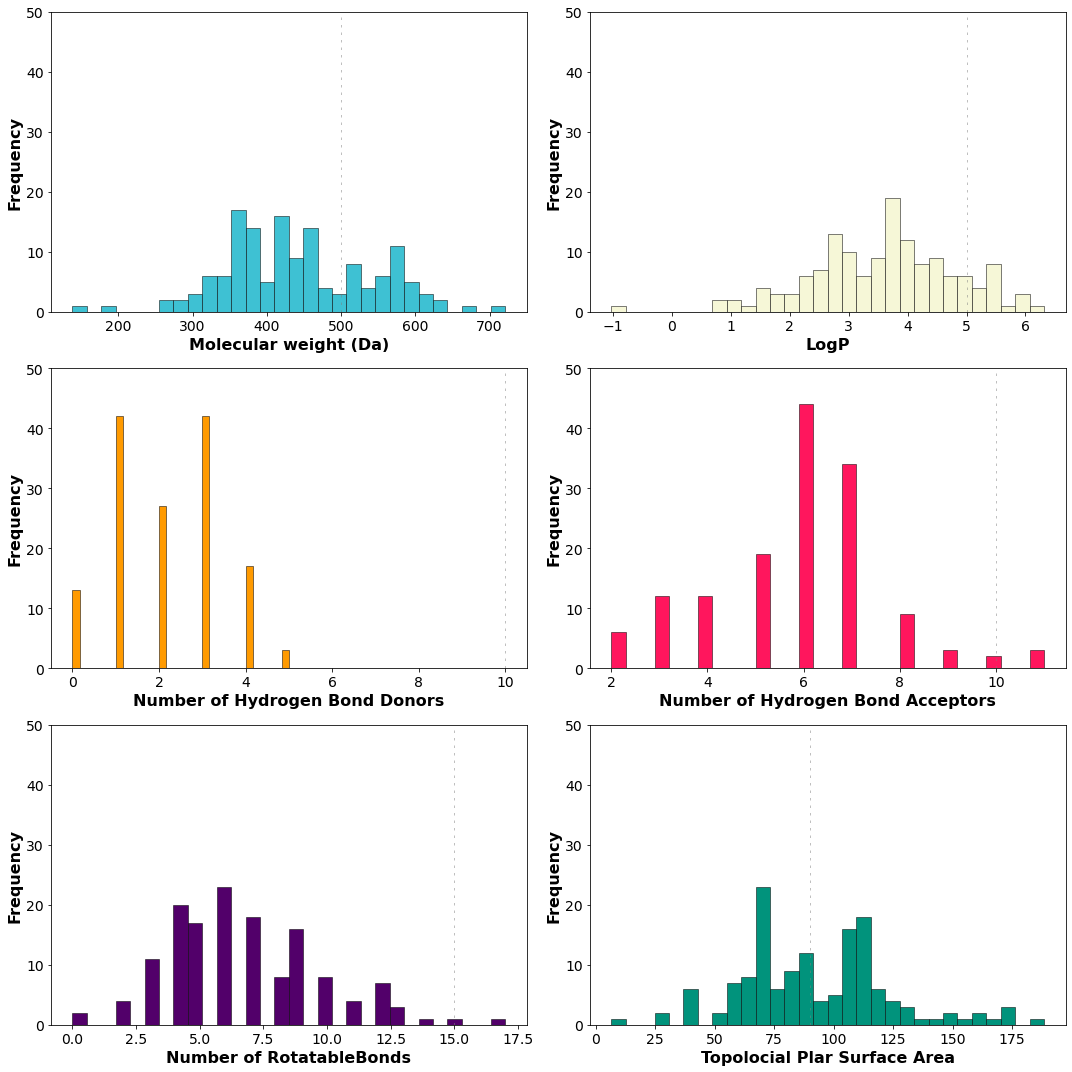

In [ ]:
#Here we are ploting the data
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4), (plt5,plt6)) = plt.subplots(3, 2)
figure.set_size_inches(15,15)

# Histogram for MW
plt1.hist(data['MW'], density=False, bins= 30, color='#3EC1D3', edgecolor='black', linewidth=0.5)
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel("Frequency", fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
plt1.set_ylim(0, 50)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

#Histogram for Log P
plt2.hist(data['LogP'], density=False, bins= 30, color='#F6F7D7', edgecolor='black', linewidth=0.5)
plt2.set_xlabel("LogP", fontsize=16, fontweight='bold')
plt2.set_ylabel("Frequency", fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_ylim(0, 50)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)


#Histogram for NumHDonors
plt3.hist(data['NumHDonors'], density=False, bins= 30, color='#FF9A00', edgecolor='black', linewidth=0.5)
plt3.set_xlabel("Number of Hydrogen Bond Donors", fontsize=16, fontweight='bold')
plt3.set_ylabel("Frequency", fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_ylim(0, 50)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

#Histogram for NumHAcceptors
plt4.hist(data['NumHAcceptors'], density=False, bins= 30, color='#FF165D', edgecolor='black', linewidth=0.5)
plt4.set_xlabel("Number of Hydrogen Bond Acceptors", fontsize=16, fontweight='bold')
plt4.set_ylabel("Frequency", fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_ylim(0, 50)
plt4.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

#Histogram for NumRotatableBonds
plt5.hist(data['NumRotatableBonds'], density=False, bins= 30, color='#52006A', edgecolor='black', linewidth=0.5)
plt5.set_xlabel("Number of RotatableBonds", fontsize=16, fontweight='bold')
plt5.set_ylabel("Frequency", fontsize=16, fontweight='bold')
plt5.tick_params(axis='both', which='major', labelsize=14)
plt5.set_ylim(0, 50)
plt5.axvline(15, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

#Histogram for TPSA
plt6.hist(data['TPSA'], density=False, bins= 30, color='#01937C', edgecolor='black', linewidth=0.5)
plt6.set_xlabel("Topolocial Plar Surface Area", fontsize=16, fontweight='bold')
plt6.set_ylabel("Frequency", fontsize=16, fontweight='bold')
plt6.tick_params(axis='both', which='major', labelsize=14)
plt6.set_ylim(0, 50)
plt6.axvline(90, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

#save file
plt.tight_layout()
plt.savefig('Lipinski_basic descriptors.pdf', dpi=300)

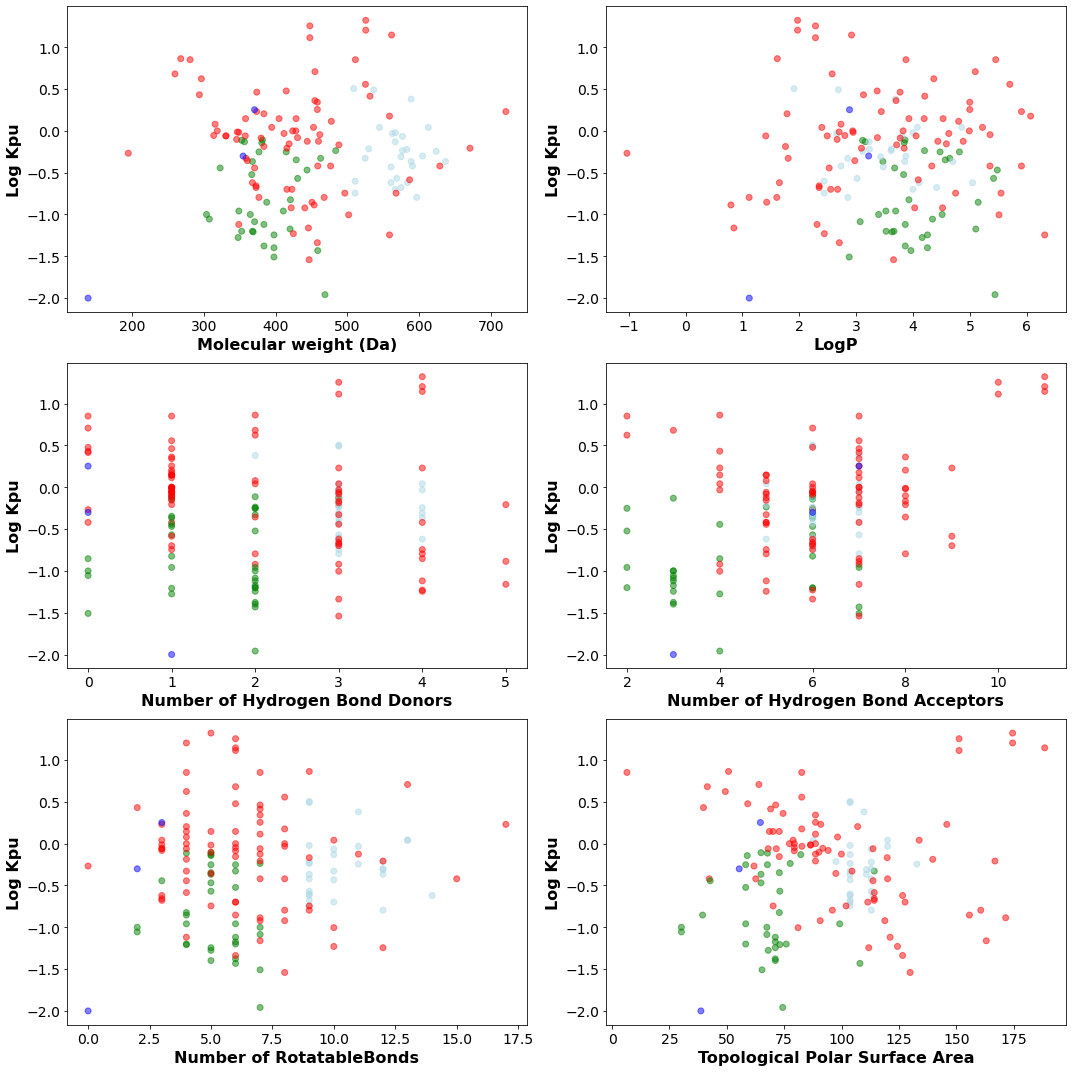

In [ ]:
#Here we are ploting the data
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



figure, ((plt1,plt2), (plt3,plt4), (plt5,plt6)) = plt.subplots(3, 2)
figure.set_size_inches(15,15)

x1 = data['MW']
x2 = data['LogP']
x3 = data['NumHDonors']
x4 = data['NumHAcceptors']
x5 = data['NumRotatableBonds']
x6 = data['TPSA']
y = data['LogKpu']
colors = {'HEK293':'red', 'SK-MEL-2':'blue', 'HL60':'green', 'SH-5Y':'lightblue', 'PBMC':'yellow'}

#MW
plt1.scatter(x1, y, alpha=0.5, c=data['Cells'].map(colors))
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel("Log Kpu", fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)

#LogP
plt2.scatter(x2, y, alpha=0.5, c=data['Cells'].map(colors))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel("Log Kpu", fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)

#NumHbondDonors
plt3.scatter(x3, y, alpha=0.5, c=data['Cells'].map(colors))
plt3.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt3.set_ylabel("Log Kpu", fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)

#NumHbondAcceptors
plt4.scatter(x4, y,  alpha=0.5, c=data['Cells'].map(colors))
plt4.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt4.set_ylabel("Log Kpu", fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)

#NumHbondAcceptors
plt5.scatter(x5, y, alpha=0.5, c=data['Cells'].map(colors))
plt5.set_xlabel('Number of RotatableBonds', fontsize=16, fontweight='bold')
plt5.set_ylabel("Log Kpu", fontsize=16, fontweight='bold')
plt5.tick_params(axis='both', which='major', labelsize=14)

#TPSA
plt6.scatter(x6, y, alpha=0.5, c=data['Cells'].map(colors))
plt6.set_xlabel('Topological Polar Surface Area', fontsize=16, fontweight='bold')
plt6.set_ylabel("Log Kpu", fontsize=16, fontweight='bold')
plt6.tick_params(axis='both', which='major', labelsize=14)

#save file
plt.tight_layout()
plt.savefig('RO5_and_Kpu.pdf', dpi=300)


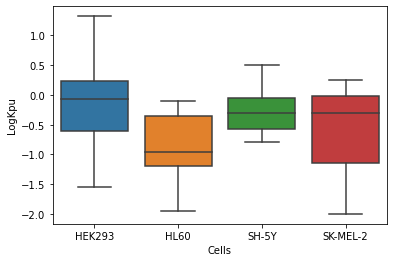

In [ ]:
ax = sns.boxplot(x="Cells", y="LogKpu", data=data)

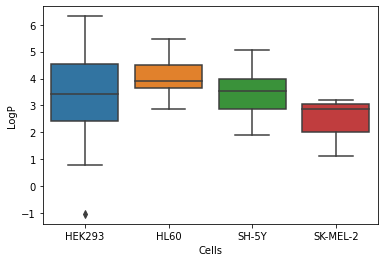

In [ ]:
ax = sns.boxplot(x="Cells", y="LogP", data=data)

### Calculation of molecular descriptors


### Cross validation

Train **model**